<a href="https://colab.research.google.com/github/zeelShah-12/PIMA-Diabetes/blob/main/PIMA_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install & Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


Load the Dataset

In [4]:
 df = pd.read_csv('pima-indians-diabetes.csv')
 df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)


Data Exploration & Cleaning

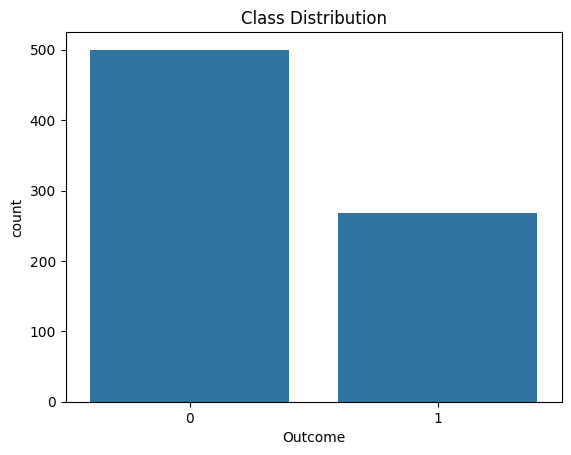

In [6]:
df.describe()
df.isnull().sum()
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()


Feature Correlation

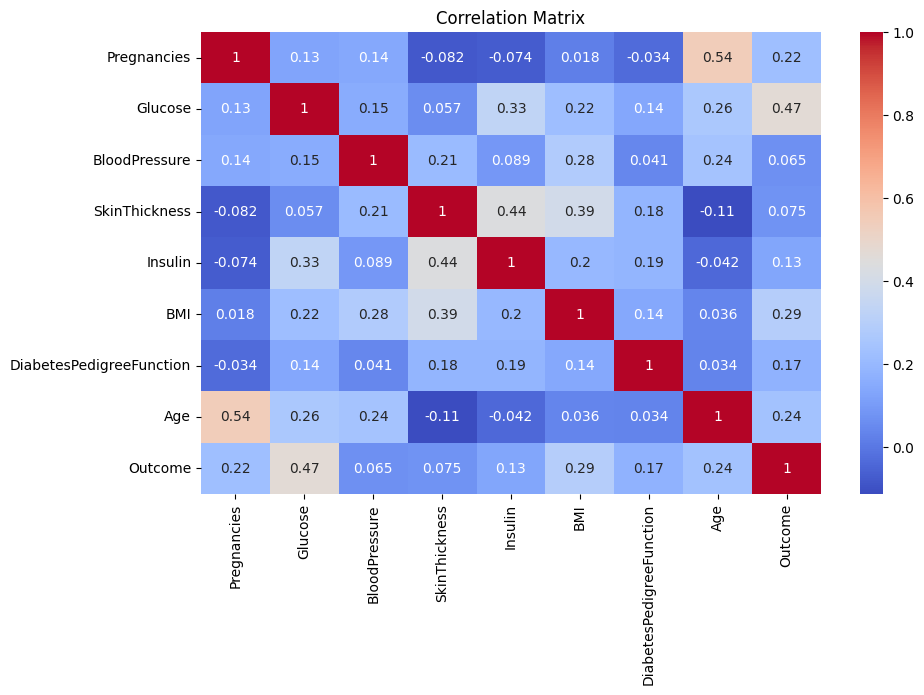

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Preprocessing

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train Models

Random Forest

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



Support Vector Machine

In [10]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Report:\n", classification_report(y_test, y_pred_svm))


SVM Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



Confusion Matrix

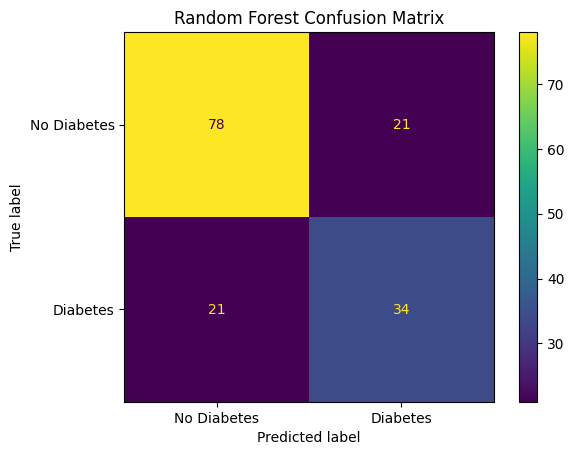

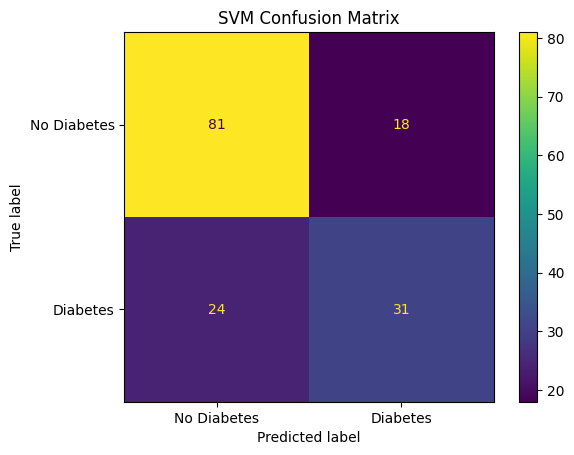

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=["No Diabetes", "Diabetes"])
plt.title("Random Forest Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, display_labels=["No Diabetes", "Diabetes"])
plt.title("SVM Confusion Matrix")
plt.show()


Make Predictions

In [12]:
sample = np.array([[2, 130, 70, 20, 85, 28.5, 0.5, 35]])  # Custom input
sample_scaled = scaler.transform(sample)
pred = rf.predict(sample_scaled)
print("Prediction:", "Diabetic" if pred[0] == 1 else "Not Diabetic")


Prediction: Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Train & Save the Model

Adding a GUI with Gradio.
Save model with joblib

In [13]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train again just in case
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Save model and scaler
joblib.dump(rf, "diabetes_model.joblib")
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

Build Gradio Web App

In [14]:
import gradio as gr
import numpy as np

# Load the model and scaler
model = joblib.load("diabetes_model.joblib")
scaler = joblib.load("scaler.joblib")

# Define prediction function
def predict_diabetes(pregnancies, glucose, bp, skin, insulin, bmi, dpf, age):
    data = np.array([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]])
    data_scaled = scaler.transform(data)
    prediction = model.predict(data_scaled)[0]
    return "Diabetic" if prediction == 1 else "Not Diabetic"

# Define Gradio interface
iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies"),
        gr.Number(label="Glucose"),
        gr.Number(label="Blood Pressure"),
        gr.Number(label="Skin Thickness"),
        gr.Number(label="Insulin"),
        gr.Number(label="BMI"),
        gr.Number(label="Diabetes Pedigree Function"),
        gr.Number(label="Age")
    ],
    outputs="text",
    title="Diabetes Prediction",
    description="Enter patient data to predict diabetes."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0f855efedd131f3031.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


une with GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best Parameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
import joblib
joblib.dump(model, "diabetes_model.joblib")
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

web app inside Colab using Gradio.

Checklist Before I Launch

In [18]:
import joblib
joblib.dump(model, "diabetes_model.joblib")
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

Add Gradio UI

In [19]:
import gradio as gr
import numpy as np
import joblib

# Load trained model and scaler
model = joblib.load("diabetes_model.joblib")
scaler = joblib.load("scaler.joblib")

# Prediction function
def predict_diabetes(pregnancies, glucose, bp, skin, insulin, bmi, dpf, age):
    data = np.array([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]])
    data_scaled = scaler.transform(data)
    prediction = model.predict(data_scaled)[0]
    return "Diabetic" if prediction == 1 else "Not Diabetic"

# Gradio interface
iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies"),
        gr.Number(label="Glucose"),
        gr.Number(label="Blood Pressure"),
        gr.Number(label="Skin Thickness"),
        gr.Number(label="Insulin"),
        gr.Number(label="BMI"),
        gr.Number(label="Diabetes Pedigree Function"),
        gr.Number(label="Age")
    ],
    outputs="text",
    title="🩺 Diabetes Risk Predictor",
    description="Enter health metrics to predict whether a person is diabetic or not."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ecda9fce06722c1488.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
